In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

연속형 임의의 데이터 생성

In [2]:
np.random.seed(0)

Temperature = np.random.normal(30,3,1000)
IceAmericano = Temperature + np.random.normal(100,8,1000)
InteriorPrice = np.random.normal(60,20,1000)

데이터 프레임 형태로 2개 데이터 합치기<br>

In [3]:
Data = pd.DataFrame({
    'Temp':Temperature,
    'Sales':IceAmericano,
    'InteriorPrice':InteriorPrice
})

In [4]:
Data.describe()

,Temp,Sales,InteriorPrice
count,1000.000000,1000.000000,1000.000000
mean,29.864230,129.973165,58.975429
std,2.962581,8.208507,19.091885
min,20.861571,105.472846,-2.337132
25%,27.904740,124.141116,45.266707
50%,29.825916,129.810618,58.950044
75%,31.820852,135.284894,72.432322
max,38.278065,155.283252,118.581925


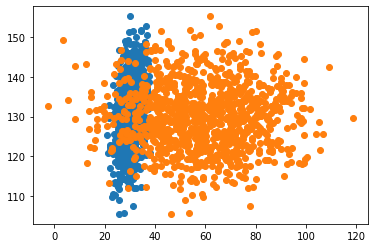

In [5]:
plt.plot(Data['Temp'], Data['Sales'], 'o')
plt.plot(Data['InteriorPrice'], Data['Sales'], 'o')
plt.show()

선형회귀 모델, 딥러닝 framework (keras)로 만들기

In [6]:
Train_x = Data[['Temp', 'InteriorPrice']].iloc[:800,:]
Train_y = Data[['Sales']].iloc[:800]

In [7]:
Valid_x = Data[['Temp', 'InteriorPrice']].iloc[-200:,:]
Valid_y = Data[['Sales']].iloc[-200:]

<br><br><br>
기본 Linear model 구성

In [8]:
model = Sequential()
model.add(Dense(3, activation='linear', input_shape=(2,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

In [9]:
model.compile(loss='mse',optimizer=Adam(learning_rate=0.1))
hist = model.fit(x=Train_x, y=Train_y, epochs=70)

Epoch 1/70
25/25 [==============================] - 0s 1ms/step - loss: 6269.5405
Epoch 2/70
25/25 [==============================] - 0s 499us/step - loss: 989.5524
Epoch 3/70
25/25 [==============================] - 0s 197us/step - loss: 283.6418
Epoch 4/70
25/25 [==============================] - 0s 614us/step - loss: 152.6779
Epoch 5/70
25/25 [==============================] - 0s 684us/step - loss: 145.9352
Epoch 6/70
25/25 [==============================] - 0s 684us/step - loss: 142.7892
Epoch 7/70
25/25 [==============================] - 0s 705us/step - loss: 144.3256
Epoch 8/70
25/25 [==============================] - 0s 647us/step - loss: 140.6614
Epoch 9/70
25/25 [==============================] - 0s 558us/step - loss: 164.9401
Epoch 10/70
25/25 [==============================] - 0s 171us/step - loss: 149.6572
Epoch 11/70
25/25 [==============================] - 0s 245us/step - loss: 151.9733
Epoch 12/70
25/25 [==============================] - 0s 608us/step - loss: 139.5548
Ep

In [10]:
model.compile(loss='mse',optimizer=Adam(learning_rate=0.0001))
hist = model.fit(x=Train_x, y=Train_y, epochs=70)

Epoch 1/70
25/25 [==============================] - 0s 456us/step - loss: 79.1254
Epoch 2/70
25/25 [==============================] - 0s 570us/step - loss: 70.9348
Epoch 3/70
25/25 [==============================] - 0s 933us/step - loss: 66.4149
Epoch 4/70
25/25 [==============================] - 0s 406us/step - loss: 64.3566
Epoch 5/70
25/25 [==============================] - 0s 693us/step - loss: 63.5628
Epoch 6/70
25/25 [==============================] - 0s 268us/step - loss: 63.3290
Epoch 7/70
25/25 [==============================] - 0s 275us/step - loss: 63.2751
Epoch 8/70
25/25 [==============================] - 0s 572us/step - loss: 63.2934
Epoch 9/70
25/25 [==============================] - 0s 555us/step - loss: 63.2493
Epoch 10/70
25/25 [==============================] - 0s 680us/step - loss: 63.2338
Epoch 11/70
25/25 [==============================] - 0s 693us/step - loss: 63.2499
Epoch 12/70
25/25 [==============================] - 0s 225us/step - loss: 63.2288
Epoch 13/70
2

In [11]:
Pred = model.predict(Valid_x)
Pred

array([[135.90747 ],
       [133.25575 ],
       [129.93135 ],
       [128.5986  ],
       [134.10973 ],
       [131.92122 ],
       [132.01064 ],
       [129.97198 ],
       [123.215775],
       [129.8497  ],
       [128.04819 ],
       [133.01137 ],
       [134.30038 ],
       [127.48323 ],
       [132.0043  ],
       [137.29962 ],
       [127.34944 ],
       [137.05568 ],
       [126.61814 ],
       [130.26817 ],
       [130.12923 ],
       [130.27095 ],
       [126.72906 ],
       [127.7015  ],
       [127.36911 ],
       [131.49408 ],
       [131.49362 ],
       [139.40501 ],
       [135.91133 ],
       [128.18706 ],
       [131.44002 ],
       [134.3317  ],
       [130.1703  ],
       [129.92032 ],
       [130.48628 ],
       [133.73854 ],
       [126.771515],
       [128.7237  ],
       [132.03232 ],
       [131.44592 ],
       [131.25658 ],
       [128.60835 ],
       [134.14478 ],
       [138.88773 ],
       [131.86922 ],
       [129.4914  ],
       [133.35696 ],
       [128.0

In [12]:
Pred = [pred[0] for pred in Pred]

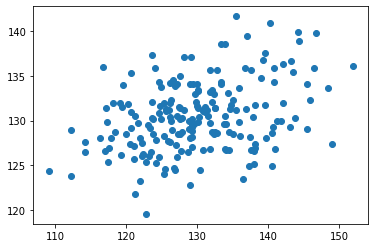

In [13]:
plt.plot(Valid_y['Sales'], Pred, 'o')
plt.show()

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 10)                40        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


<br><br><br>
모델의 weight, 그리고 상수 확인

In [15]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 3) dtype=float32, numpy=
 array([[ 0.14705046, -0.10671474,  0.7424891 ],
        [ 0.35168484,  0.19369069, -0.2699132 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(3,) dtype=float32, numpy=array([ 13.174282, -11.251043,  13.232756], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(3, 10) dtype=float32, numpy=
 array([[-0.48304787, -0.21493143, -0.54817694, -0.09889859,  0.38068134,
         -0.51371413, -1.2025926 , -1.1093144 , -1.1146843 ,  0.79751503],
        [-0.00466703, -0.596717  , -0.61380357,  0.29227364, -0.48953593,
         -0.8035019 , -0.8197456 , -0.20313188, -0.35378522, -0.03156108],
        [-1.4952989 , -0.67110366, -0.61773795, -0.39540088,  0.21782757,
         -0.34490934, -0.04276246,  0.09860118, -0.53868765,  0.9434487 ]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.59196806,  0.        , -1.0776374 ,  0.        , 14.45336   ,
        -0.554260

<br><br><br>
모델의 weight, 상수만 출력

In [16]:
for i in range(len(model.weights)):
    if i%2 == 0: print(int(i/2+1), '번째 Layer coefficients')
    if i%2 == 1: print(int(i/2+1), '번째 Layer 상수')
    print(model.weights[i].value().numpy())
    print()

1 번째 Layer coefficients
[[ 0.14705046 -0.10671474  0.7424891 ]
 [ 0.35168484  0.19369069 -0.2699132 ]]

1 번째 Layer 상수
[ 13.174282 -11.251043  13.232756]

2 번째 Layer coefficients
[[-0.48304787 -0.21493143 -0.54817694 -0.09889859  0.38068134 -0.51371413
  -1.2025926  -1.1093144  -1.1146843   0.79751503]
 [-0.00466703 -0.596717   -0.61380357  0.29227364 -0.48953593 -0.8035019
  -0.8197456  -0.20313188 -0.35378522 -0.03156108]
 [-1.4952989  -0.67110366 -0.61773795 -0.39540088  0.21782757 -0.34490934
  -0.04276246  0.09860118 -0.53868765  0.9434487 ]]

2 번째 Layer 상수
[-0.59196806  0.         -1.0776374   0.         14.45336    -0.5542606
 -0.71114546 -0.49157524 -0.812687   14.406778  ]

3 번째 Layer coefficients
[[-1.3261403 ]
 [ 0.3227741 ]
 [ 0.5327928 ]
 [-0.6032321 ]
 [ 1.0831085 ]
 [ 0.5007497 ]
 [ 0.43547848]
 [ 0.6498167 ]
 [ 0.21109235]
 [ 1.3192135 ]]

3 번째 Layer 상수
[8.647347]



# L2 regularizer (Ridge)

In [17]:
model = Sequential()
model.add(Dense(3, activation='linear', input_shape=(2,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear', kernel_regularizer=tf.keras.regularizers.l2(0.1)))

In [18]:
model.compile(loss='mse',optimizer=Adam(learning_rate=0.1))
hist = model.fit(x=Train_x, y=Train_y, epochs=70)

Epoch 1/70
25/25 [==============================] - 0s 417us/step - loss: 1991.2561
Epoch 2/70
25/25 [==============================] - 0s 747us/step - loss: 236.5453
Epoch 3/70
25/25 [==============================] - 0s 675us/step - loss: 183.7654
Epoch 4/70
25/25 [==============================] - 0s 694us/step - loss: 152.8162
Epoch 5/70
25/25 [==============================] - 0s 591us/step - loss: 166.4198
Epoch 6/70
25/25 [==============================] - 0s 159us/step - loss: 152.5114
Epoch 7/70
25/25 [==============================] - 0s 240us/step - loss: 142.8062
Epoch 8/70
25/25 [==============================] - 0s 608us/step - loss: 174.1606
Epoch 9/70
25/25 [==============================] - 0s 668us/step - loss: 174.6605
Epoch 10/70
25/25 [==============================] - 0s 700us/step - loss: 171.1872
Epoch 11/70
25/25 [==============================] - 0s 647us/step - loss: 152.1750
Epoch 12/70
25/25 [==============================] - 0s 569us/step - loss: 153.0723


In [19]:
model.compile(loss='mse',optimizer=Adam(learning_rate=0.0001))
hist = model.fit(x=Train_x, y=Train_y, epochs=70)

Epoch 1/70
25/25 [==============================] - 0s 381us/step - loss: 71.1435
Epoch 2/70
25/25 [==============================] - 0s 713us/step - loss: 66.5885
Epoch 3/70
25/25 [==============================] - 0s 698us/step - loss: 64.2453
Epoch 4/70
25/25 [==============================] - 0s 700us/step - loss: 63.3839
Epoch 5/70
25/25 [==============================] - 0s 588us/step - loss: 63.0115
Epoch 6/70
25/25 [==============================] - 0s 118us/step - loss: 62.7902
Epoch 7/70
25/25 [==============================] - 0s 238us/step - loss: 62.6552
Epoch 8/70
25/25 [==============================] - 0s 631us/step - loss: 62.5243
Epoch 9/70
25/25 [==============================] - 0s 667us/step - loss: 62.5439
Epoch 10/70
25/25 [==============================] - 0s 695us/step - loss: 62.3943
Epoch 11/70
25/25 [==============================] - 0s 633us/step - loss: 62.3141
Epoch 12/70
25/25 [==============================] - 0s 145us/step - loss: 62.2845
Epoch 13/70
2

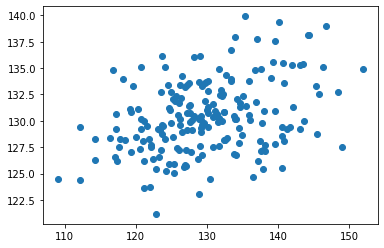

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
 dense_4 (Dense)             (None, 10)                40        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


In [20]:
Pred = model.predict(Valid_x)
Pred

Pred = [pred[0] for pred in Pred]
plt.plot(Valid_y['Sales'], Pred, 'o')
plt.show()

model.summary()

In [21]:
model.weights

[<tf.Variable 'dense_3/kernel:0' shape=(2, 3) dtype=float32, numpy=
 array([[-0.6864482 ,  0.23755059, -0.50520957],
        [ 0.5113875 ,  0.3241102 ,  0.4259107 ]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(3,) dtype=float32, numpy=array([-12.229983,  12.075177, -11.275559], dtype=float32)>,
 <tf.Variable 'dense_4/kernel:0' shape=(3, 10) dtype=float32, numpy=
 array([[ 0.47946954, -1.1412933 , -0.2903409 ,  0.01103586, -0.2702768 ,
         -0.16797203, -0.06127053, -0.504177  ,  0.13867636, -0.77681136],
        [-0.51641905, -0.52406573, -0.4675202 , -0.19676931,  0.19892186,
          1.0233858 , -0.04560011, -0.5015068 , -0.5685566 , -0.39927903],
        [-0.27583948,  0.76815975,  1.2638022 , -0.7532931 ,  0.02785595,
         -0.3086085 , -0.12586764,  0.8694372 ,  0.6874578 ,  1.3290044 ]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(10,) dtype=float32, numpy=
 array([ 0.        ,  0.44608665, -0.7443714 ,  6.300519  , 12.844851  ,
        13.30

In [22]:
for i in range(len(model.weights)):
    if i%2 == 0: print(int(i/2+1), '번째 Layer coefficients')
    if i%2 == 1: print(int(i/2+1), '번째 Layer 상수')
    print(model.weights[i].value().numpy())
    print()

1 번째 Layer coefficients
[[-0.6864482   0.23755059 -0.50520957]
 [ 0.5113875   0.3241102   0.4259107 ]]

1 번째 Layer 상수
[-12.229983  12.075177 -11.275559]

2 번째 Layer coefficients
[[ 0.47946954 -1.1412933  -0.2903409   0.01103586 -0.2702768  -0.16797203
  -0.06127053 -0.504177    0.13867636 -0.77681136]
 [-0.51641905 -0.52406573 -0.4675202  -0.19676931  0.19892186  1.0233858
  -0.04560011 -0.5015068  -0.5685566  -0.39927903]
 [-0.27583948  0.76815975  1.2638022  -0.7532931   0.02785595 -0.3086085
  -0.12586764  0.8694372   0.6874578   1.3290044 ]]

2 번째 Layer 상수
[ 0.          0.44608665 -0.7443714   6.300519   12.844851   13.309403
 10.545211   -0.6048409  -0.6005391  -0.82042223]

3 번째 Layer coefficients
[[-9.3459971e-07]
 [ 2.7762079e-01]
 [ 3.5928786e-01]
 [ 2.4401917e-01]
 [ 1.0293932e+00]
 [ 1.6714764e+00]
 [ 7.9691607e-01]
 [ 8.7891832e-02]
 [ 3.3066160e-37]
 [ 3.7702641e-01]]

3 번째 Layer 상수
[11.202647]



# L1 regularizer (Lasso)

In [23]:
model = Sequential()
model.add(Dense(3, activation='linear', input_shape=(2,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear', kernel_regularizer=tf.keras.regularizers.l1(0.1)))


model.compile(loss='mse',optimizer=Adam(learning_rate=0.1))
hist = model.fit(x=Train_x, y=Train_y, epochs=70)

model.compile(loss='mse',optimizer=Adam(learning_rate=0.0001))
hist = model.fit(x=Train_x, y=Train_y, epochs=70)

Epoch 1/70
25/25 [==============================] - 0s 366us/step - loss: 2972.2236
Epoch 2/70
25/25 [==============================] - 0s 746us/step - loss: 292.2491
Epoch 3/70
25/25 [==============================] - 0s 614us/step - loss: 159.0400
Epoch 4/70
25/25 [==============================] - 0s 702us/step - loss: 155.4865
Epoch 5/70
25/25 [==============================] - 0s 690us/step - loss: 151.3298
Epoch 6/70
25/25 [==============================] - 0s 294us/step - loss: 153.5083
Epoch 7/70
25/25 [==============================] - 0s 204us/step - loss: 166.4246
Epoch 8/70
25/25 [==============================] - 0s 620us/step - loss: 158.1505
Epoch 9/70
25/25 [==============================] - 0s 623us/step - loss: 151.0729
Epoch 10/70
25/25 [==============================] - 0s 633us/step - loss: 147.2987
Epoch 11/70
25/25 [==============================] - 0s 695us/step - loss: 155.2603
Epoch 12/70
25/25 [==============================] - 0s 680us/step - loss: 152.2168


In [24]:
for i in range(len(model.weights)):
    if i%2 == 0: print(int(i/2+1), '번째 Layer coefficients')
    if i%2 == 1: print(int(i/2+1), '번째 Layer 상수')
    print(model.weights[i].value().numpy())
    print()

1 번째 Layer coefficients
[[-0.5749201   0.07986549  0.96325713]
 [ 0.41496387 -0.13295731 -0.24870484]]

1 번째 Layer 상수
[ 8.720314  5.949396 10.946054]

2 번째 Layer coefficients
[[ 0.5337557   0.24215037  0.0883019  -0.4696852  -0.94022423 -0.15731029
   0.0815131  -0.9816783  -0.46498463 -0.26375818]
 [ 0.20455581  0.1049737  -0.38079494  0.19267386  0.14857228  0.9189202
   0.09478883  0.16334704  0.30720776 -0.02422911]
 [ 0.82082015  0.30230603 -0.01097814 -0.26243356 -0.47481486 -1.068184
   0.40608802 -0.5114344  -0.4275417  -0.6255931 ]]

2 번째 Layer 상수
[12.436105  10.690521   8.05938    0.        -0.8301346 -0.6502207
 13.002689  -0.8391966 -0.7572378  0.       ]

3 번째 Layer coefficients
[[ 1.3397017e+00]
 [ 1.4023968e+00]
 [ 8.9818501e-01]
 [ 2.8754088e-05]
 [-9.1086084e-05]
 [ 2.5782112e-05]
 [ 1.0350884e+00]
 [-1.3325105e-05]
 [ 4.0961206e-01]
 [-2.5063064e-06]]

3 번째 Layer 상수
[9.520877]

